In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv('apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


A_id column not needed so drop the column

In [9]:
df.drop('A_id',axis='columns',inplace=True)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [11]:
df.shape

(4001, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [13]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

Here the null value is 0.02% less than 1 percentage so drop it

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [18]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [19]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

Here, acidity is represented as an object type. Convert it to a numerical type

In [21]:
df.Acidity=pd.to_numeric(df.Acidity)

In [22]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [23]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


check for Outlier

Using IQR

In [24]:
Q1 = df['Size'].quantile(0.25)
Q3 = df['Size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Size'] < lower_bound) | (df['Size'] > upper_bound)]


In [25]:
outliers

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
251,5.189624,-0.380352,0.674041,2.711903,4.226955,-2.088012,3.677497,good
276,-6.129668,4.738227,0.253477,-1.393228,1.964849,-3.410881,-5.015264,good
634,5.866232,0.821114,-0.592951,0.768464,3.050095,0.684049,6.701395,good
1110,-5.975032,-0.829743,5.538865,2.010827,1.415675,-0.997706,5.416040,bad
1381,6.406367,-2.752347,-4.164118,0.415241,0.999640,3.995602,1.724252,good
1516,-6.690121,3.556307,0.164711,0.143442,2.567518,-2.319071,-2.036699,good
2001,-6.905803,-0.599815,3.640811,-0.807991,3.090987,-1.912564,-2.135252,good
2002,5.403276,-4.026721,-3.991688,1.621552,2.086260,3.162070,4.915941,good
2035,-5.879771,0.985776,0.483918,0.896278,3.640081,-1.692468,-1.424985,good
2120,4.834608,-5.187416,-1.230021,1.010198,4.759434,0.311024,2.607867,good


In [27]:
col=df.columns

In [29]:
for i in col:
    print(i)

Size
Weight
Sweetness
Crunchiness
Juiciness
Ripeness
Acidity
Quality


In [32]:
col=col[:7]

In [33]:
fo

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [38]:
for i in col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(i)
    print(outliers[i])

Size
251     5.189624
276    -6.129668
634     5.866232
1110   -5.975032
1381    6.406367
1516   -6.690121
2001   -6.905803
2002    5.403276
2035   -5.879771
2120    4.834608
2331   -6.669725
2458   -6.713315
2514    4.799683
2532    4.842414
2642    5.074031
2676   -6.710169
2875    5.225383
2916   -6.087715
3484    5.104364
3559   -7.151703
3859   -6.099551
3973    5.865861
Name: Size, dtype: float64
Weight
83     -6.235107
247     5.149000
257     3.603286
276     4.738227
351    -5.103104
412    -5.227087
484     3.285301
526    -6.556685
561    -5.908736
573    -5.478682
672     4.363066
889    -5.592343
895     3.821094
1023   -5.413733
1117    3.598690
1386   -6.000748
1403    3.440811
1446    4.151368
1516    3.556307
1523   -6.581590
1546    3.183011
1629   -5.570705
1772   -5.746384
1919   -5.343076
2045    4.369571
2055    3.332821
2106    4.093888
2120   -5.187416
2151    3.164263
2196    3.207896
2319    3.511758
2320    3.219762
2327   -5.542290
2368    3.265246
2389    3

Using Boxplot

In [39]:
import seaborn as sns

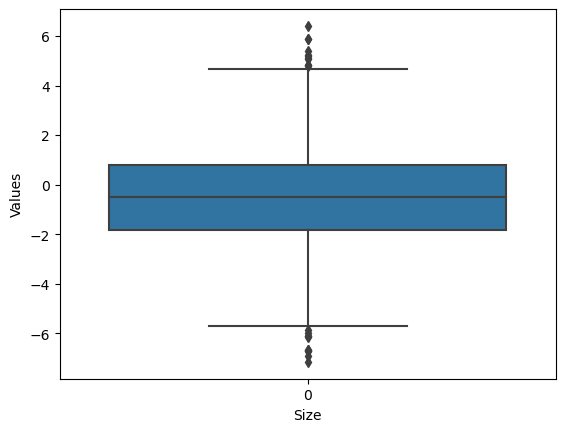

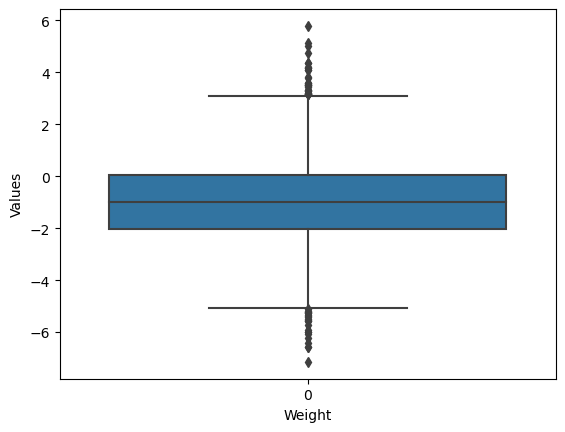

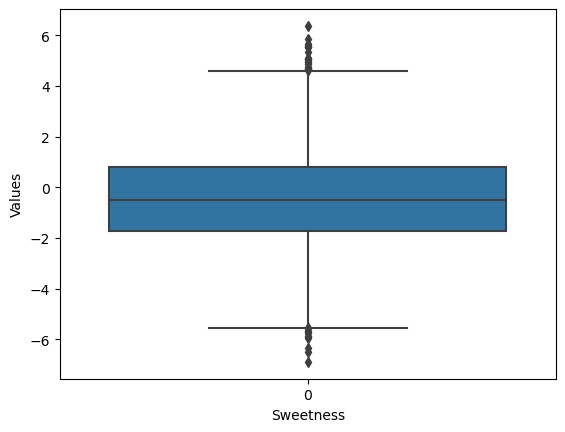

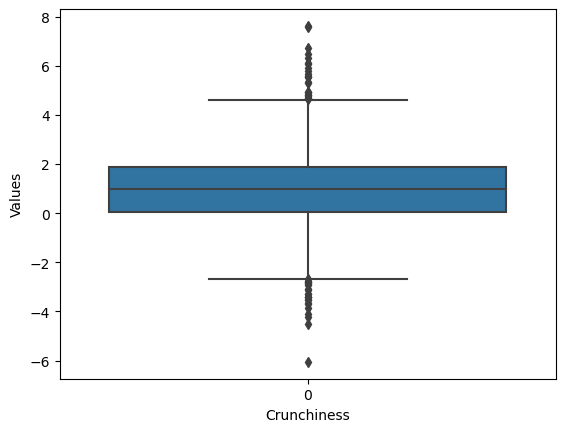

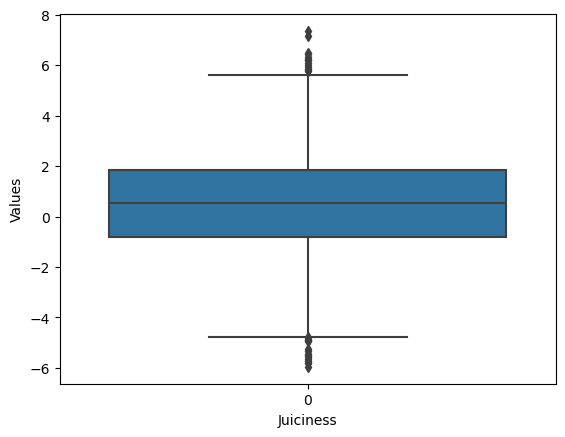

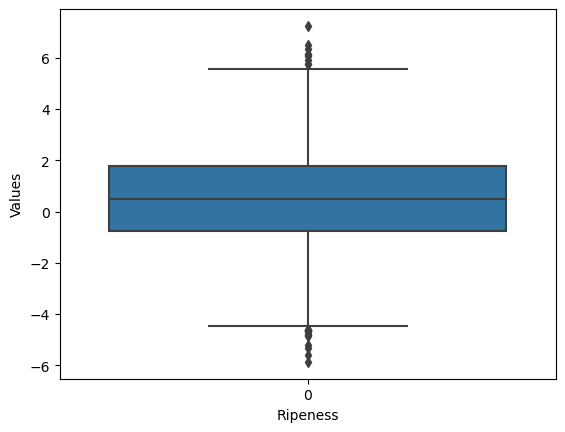

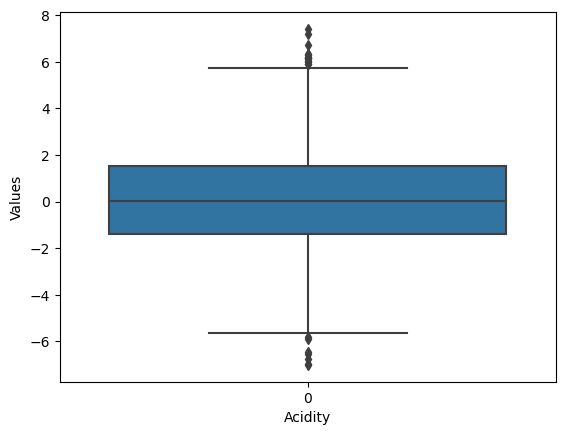

In [52]:
for i in col:
    plt.figure()
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Values')

These boxplot shows that all the columns have the outliers.

In [58]:
v=df.Quality.value_counts()

<Axes: xlabel='Quality'>

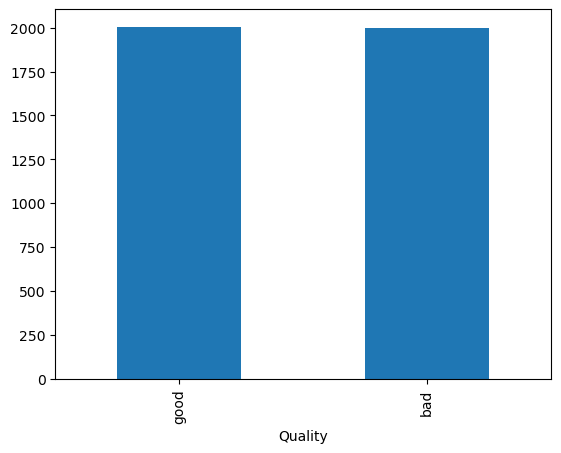

In [59]:
v.plot(kind='bar')

In [68]:
new_df=df.iloc[:,:7]

In [69]:
new_df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [84]:
 for i in new_df.columns:
    q1=new_df[i].quantile(0.25)
    q3=new_df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    higher_bound=q3+1.5*iqr
    df[i]=new_df[(new_df[i]>=lower_bound) & (new_df[i]<=higher_bound) ] [i]

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3978 non-null   float64
 1   Weight       3946 non-null   float64
 2   Sweetness    3968 non-null   float64
 3   Crunchiness  3953 non-null   float64
 4   Juiciness    3968 non-null   float64
 5   Ripeness     3976 non-null   float64
 6   Acidity      3980 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 410.3+ KB


In [93]:
df.isnull().sum()

Size           22
Weight         54
Sweetness      32
Crunchiness    47
Juiciness      32
Ripeness       24
Acidity        20
Quality         0
dtype: int64

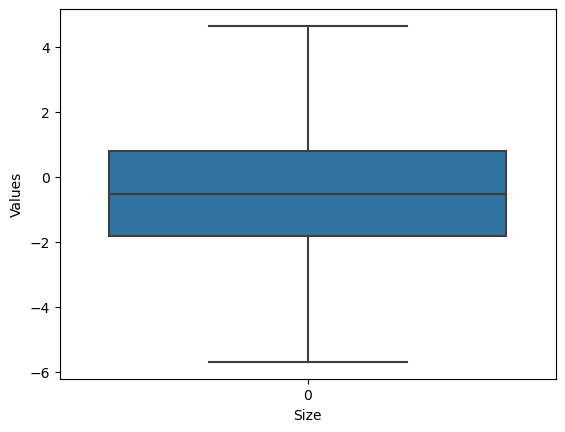

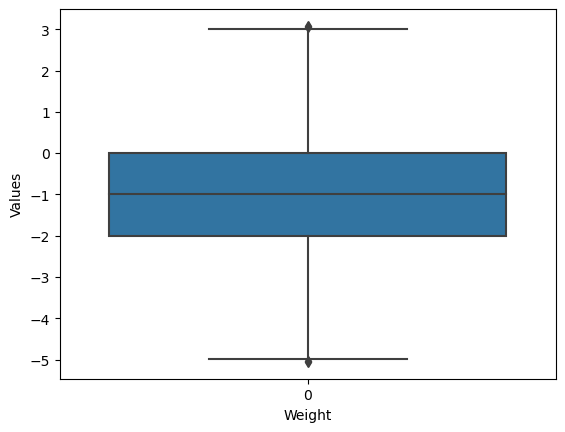

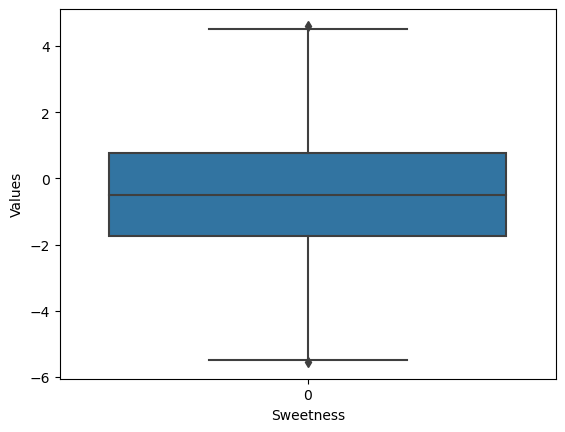

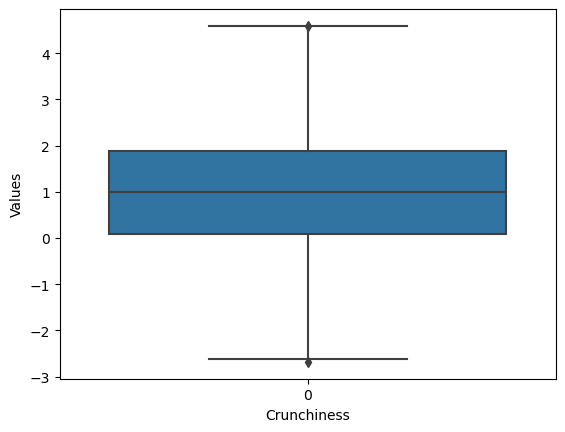

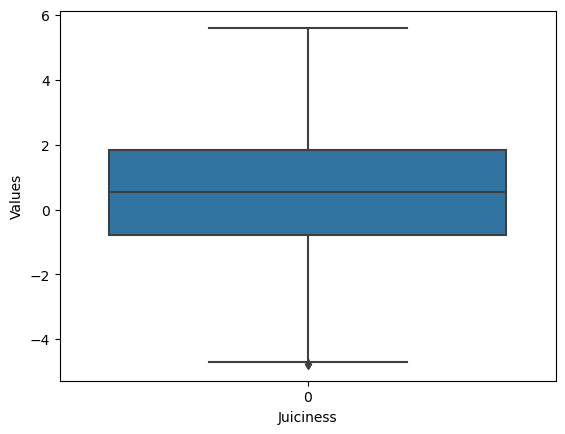

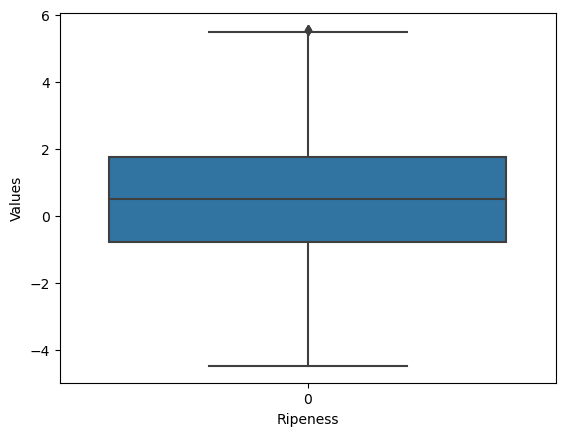

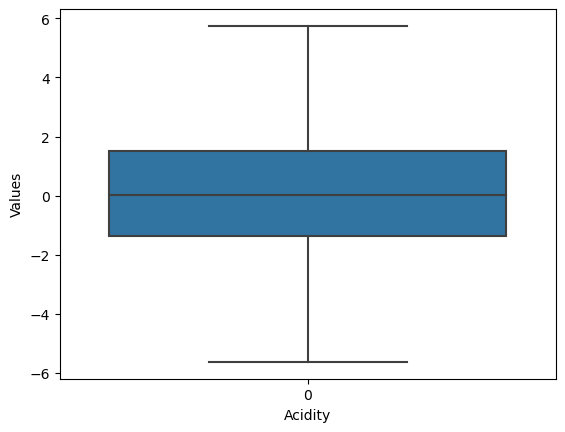

In [96]:
for i in col:
    plt.figure()
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Values')

By examining the box plots, we can clearly see that the outliers have been successfully addressed.

In [100]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3978.000000,3946.000000,3968.000000,3953.000000,3968.000000,3976.000000,3980.000000
mean,-0.502679,-0.999523,-0.485084,0.983335,0.518410,0.505766,0.067983
std,1.882759,1.511450,1.884943,1.318371,1.865536,1.830208,2.066560
min,-5.692093,-5.058679,-5.548641,-2.683859,-4.756731,-4.471210,-5.634195
25%,-1.805829,-1.998099,-1.733598,0.079945,-0.789481,-0.760710,-1.376699
50%,-0.513703,-0.986963,-0.509611,0.997933,0.536251,0.506934,0.020796
75%,0.790415,0.013626,0.777370,1.882414,1.825459,1.756264,1.501195
max,4.649923,3.081538,4.606386,4.591936,5.598023,5.553256,5.746699


<Axes: xlabel='Size', ylabel='Count'>

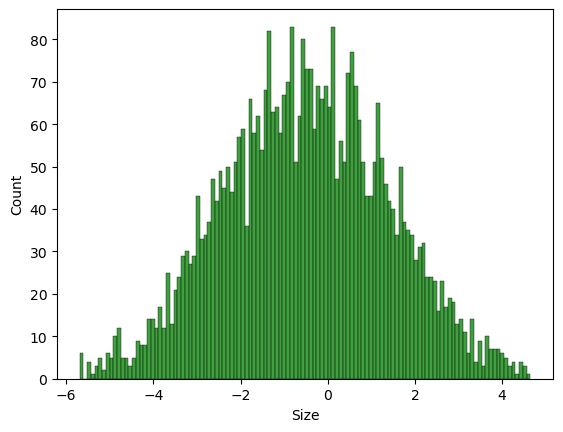

In [112]:
sns.histplot(data=df.Size,color='green',edgecolor='black',bins=120)

1-All apples in the data have range size from -6 to 4

2-The mean of the apple size equals to -0.502679

3-Maximum size is equals to 4.649923


<Axes: xlabel='Weight', ylabel='Count'>

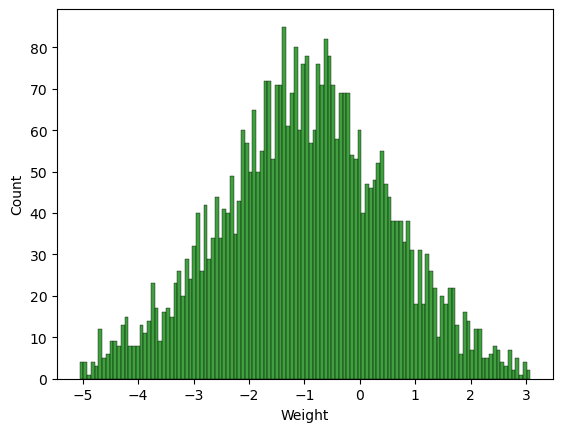

In [113]:
sns.histplot(data=df.Weight,color='green',edgecolor='black',bins=120)

In [118]:
df.drop("Acidity",axis='columns',inplace=True)

In [122]:
cor=df.iloc[:,:6]

In [123]:
cor.corr()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
Size,1.000000,-0.142270,-0.316384,0.167966,-0.023137,-0.141365
Weight,-0.142270,1.000000,-0.122553,-0.088520,-0.091578,-0.225686
Sweetness,-0.316384,-0.122553,1.000000,-0.014351,0.090149,-0.261095
Crunchiness,0.167966,-0.088520,-0.014351,1.000000,-0.231174,-0.184367
Juiciness,-0.023137,-0.091578,0.090149,-0.231174,1.000000,-0.109068
Ripeness,-0.141365,-0.225686,-0.261095,-0.184367,-0.109068,1.000000


<Axes: >

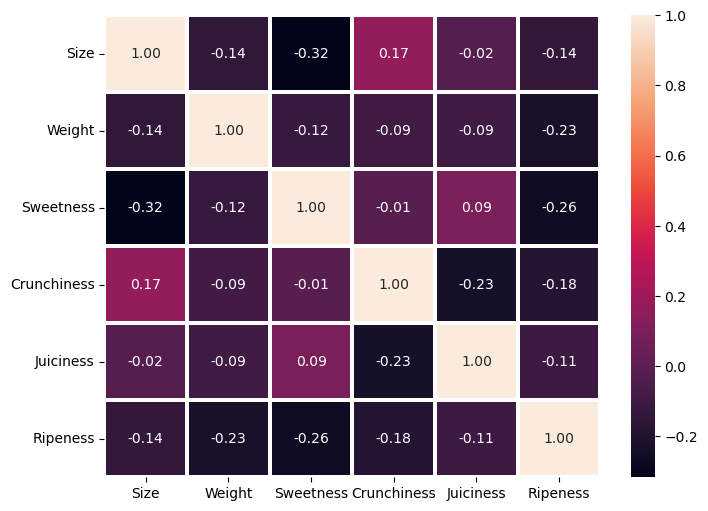

In [140]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=cor.corr(),annot=True,fmt=".2f",linewidths=1.5)

The heatmap shows the correlation between the columns.The value more towards the 1,it is positively correlated.The value more towards the -1,it is negatively correlated.